In [1]:
import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")


Qiskit version: 2.0.3
Grader version: 0.22.9


In [2]:
# Save your API key to track your progress and have access to the quantum computers

your_api_key = ""
your_crn = "

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="qgss-2025",
    overwrite=True
)


In [4]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2


Matplotlib is building the font cache; this may take a moment.


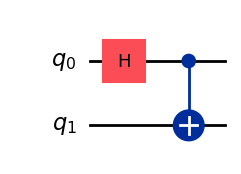

In [5]:
# Create a new circuit with a single qubit
qc = QuantumCircuit(2)
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubit 1
qc.cx(0, 1)
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")


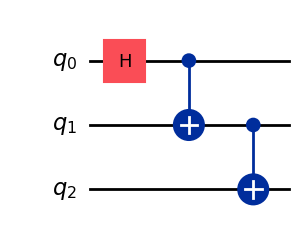

In [6]:
from qiskit import QuantumCircuit

# Create a new circuit with three qubits
qc = QuantumCircuit(3)

### WRITE YOUR CODE BELOW HERE ###
# Add a H gate to qubit 0
qc.h(0)

# Add a CNOT gate to qubits 0 and 1
qc.cx(0, 1)

# Add a CNOT gate to qubits 1 and 2
qc.cx(1, 2)
### YOUR CODE FINISHES HERE    ###

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")


In [7]:
# Submit your answer using following code
grade_lab0_ex1(qc)


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


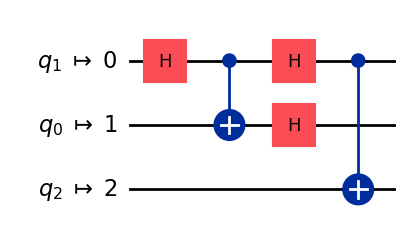

In [8]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

### WRITE YOUR CODE BELOW HERE ###
# coupling_map: allowed (undirected) edges on your device
coupling_map = [[0, 1], [0, 2]]

# create a pass manager (default opt_level=1) with that coupling map
pm = generate_preset_pass_manager(coupling_map=coupling_map)
### YOUR CODE FINISHES HERE    ###

# transpile with the pass manager
qc_transpiled = pm.run(qc)

# visualize the transpiled circuit
qc_transpiled.draw("mpl")


In [9]:
# Submit your answer using following code
grade_lab0_ex2(qc_transpiled)


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [10]:
# Add measurement operations
qc.measure_all()

# Set up the backend
backend = AerSimulator()

# Set up the sampler
sampler = Sampler(mode=backend)

# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# Get the results
results_sampler = job.result()


In [11]:
# Set up the Estimator
estimator = Estimator(mode=backend)

# Define some observables
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Submit the circuit to Estimator
pub = (qc, observables)
job = estimator.run(pubs=[pub])

# Get the results
results_estimator = job.result()

  Outcomes : {'111': 534, '000': 490}


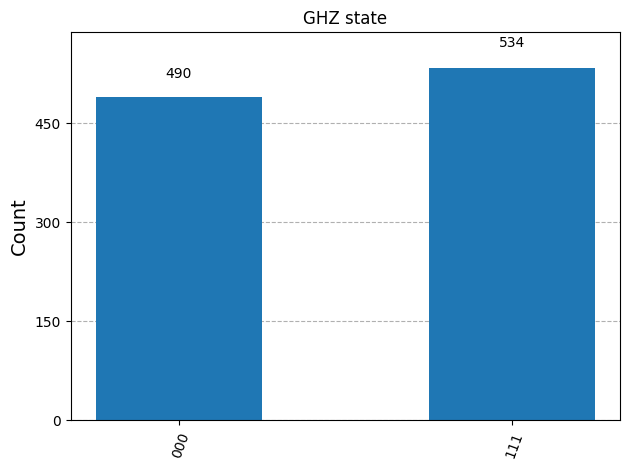

In [12]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Expectation values: [('ZZZ', np.float64(0.00390625)), ('ZZX', np.float64(-0.01318359375)), ('ZII', np.float64(0.0283203125)), ('XXI', np.float64(-0.013671875)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


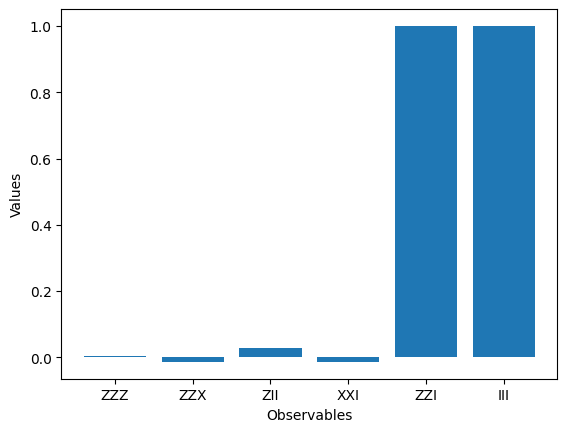

In [13]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# Set up our plot
container = plt.bar(observables_list, exp_values, width=0.8)
# Label each axis
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

In [14]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")


Lab 0: 2/2 exercises completed (100%)
    ✅ 1195 participants have completed this lab
Lab 1: 0/9 exercises completed (0%)
    ✅ 207 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
